In [275]:
import random

In [276]:
# Factors that affect the population

# 1. Starting Population
# 2. Infant mortality
# 3. Food
# 4. Fertility x and Fertility y
# 5. Healthcare
# 6. Agriculture
# 7. Chance of disaster
# 8. Age of death

In [277]:
startingPopulation = 50
infantMortality = 25
food = 0
agriculture = 5
disasterChance = 10
fertilityX = 18
fertilityY = 35
youthMortality = 45
ageOfDeath = 80

In [278]:
populationList = []

In [279]:
class Person:
    def __init__(self, age):
        self.gender = random.randint(0,1)
        self.age = age

In [280]:
# This function will run every year. It will produce food for the next year and if not enough able people produce
# food, people will die from starvation.

def harvest(food, agriculture):
    ablePeople = 0
    for person in populationList:
        if person.age > 18:
            ablePeople += 1
        
    food += ablePeople * agriculture
    
    if food < len(populationList):
        del populationList[0: int(len(populationList) - food)]
    else:
        food -= len(populationList)

In [281]:
# This function will increase the population based on the given conditions

def reproduce(fertilityX, fertilityY):
    for person in populationList:
        if person.age > fertilityX and person.age < fertilityY and random.randint(0,5) == 1 and random.randint(0,100) > 5:
            populationList.append(Person(0))

In [282]:
# This function will kickstart the simulation by adding the starting population
# to the populationList

def beginSim():
    for x in range(startingPopulation):
        populationList.append(Person(random.randint(18,50)))

In [283]:
beginSim()

In [284]:
popTrack = []
def runYear(food, agriculture, fertilityX, fertilityY, infantMortality):
    harvest(food, agriculture)
    reproduce(fertilityX, fertilityY)
    
    for person in populationList:
        if person.age>ageOfDeath:
            populationList.remove(person)
        else:
            person.age += 1
    
    # There's a 10% chance of disaster happening
    if random.randint(0,100)<disasterChance:
        del populationList[0:int(random.uniform(0.05,0.2)*len(populationList))]

    popTrack.append(len(populationList))
    infantMortality *= 0.9
    return infantMortality

In [285]:
runYear

<function __main__.runYear(food, agriculture, fertilityX, fertilityY, infantMortality)>

In [286]:
while len(populationList)<100000 and len(populationList) > 1:
    infantMortality = runYear(food, agriculture, fertilityX, fertilityY, infantMortality)

In [287]:
import numpy as np

popTrack_np = np.array(popTrack)

Text(0, 0.5, 'Population')

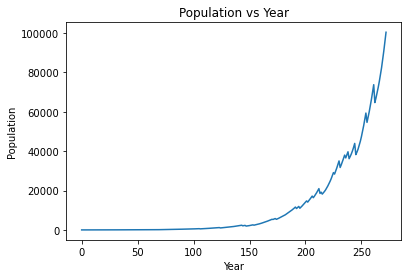

In [288]:
from matplotlib import pyplot as plt

plt.plot(range(len(popTrack_np)), popTrack_np)
plt.title("Population vs Year")
plt.xlabel("Year")
plt.ylabel("Population")